<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">
            <tr>
                <td  style="border: none!important;">
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                <h1 align=center><font size=5 color="#87CEEB"> <b>Cognitive Neuroscience</b><br><br>HomeWork #1</i></font></h1>
            </td>
            <td style="border: none!important;">
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
            </td>
        </tr>
        </table>
    
</div>
<br>
<font size=3 color="#00FFFF"> Sina Pirmoradian : 810101125 <br></font><br>

<font color="#FA5F55"><h1>HW #1 Question #1</h2></font>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


<font color="#F4BB44"><h3>Import Reqiured Library</h3></font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from sklearn.metrics import roc_auc_score

In [3]:
# Import necessary libraries
import pandas as pd

# Read the data from CSV file
data = pd.read_csv("/content/drive/MyDrive/Cognetive/data.csv")

# Group the data by levelFace and trialKeys columns and count the number of "Hasan" and "Goli" ratings
counts = data.groupby(['levelFace', 'trialKeys']).agg({'srespChoice': ['count', lambda x: (x == 'Hasan').sum(), lambda x: (x == 'Goli').sum()]})

# Rename columns for better readability
counts.columns = ['total_responses', 'Hasan_responses', 'Goli_responses']

# Reset the index to make levelFace and trialKeys columns into regular columns
counts = counts.reset_index()

# Display the resulting counts
print(counts)



    levelFace trialKeys  total_responses  Hasan_responses  Goli_responses
0          -3      AbHa             3612              515               0
1          -3    MahGol             3618                0             586
2          -2      AbHa             3610              703               0
3          -2    MahGol             3614                0             709
4          -1      AbHa             3603             1090               0
5          -1    MahGol             3616                0             982
6           0      AbHa             3596             1844               0
7           0    MahGol             3615                0            1725
8           1      AbHa             3606             2664               0
9           1    MahGol             3607                0            2257
10          2      AbHa             3604             3035               0
11          2    MahGol             3602                0            2634
12          3      AbHa             36

<font color="#F4BB44"><h3>Way_1</h3></font>

---



This code groups the data in the data DataFrame by trialKeys, levelFace, and srespChoice columns using the groupby method. It then counts the number of each srespChoice value within each group using the size method. The resulting DataFrame has a MultiIndex with trialKeys and levelFace as the index levels and srespChoice as the columns. The unstack method converts the srespChoice column into columns, so that we have a separate column for each choice value. The fill_value=0 argument fills any missing values with 0.

In [4]:
counts = data.groupby(['trialKeys', 'levelFace', 'srespChoice']).size()
print(counts)

trialKeys  levelFace  srespChoice
AbHa       -3         Abbas          3097
                      Hasan           515
           -2         Abbas          2907
                      Hasan           703
           -1         Abbas          2513
                      Hasan          1090
            0         Abbas          1752
                      Hasan          1844
            1         Abbas           942
                      Hasan          2664
            2         Abbas           569
                      Hasan          3035
            3         Abbas           392
                      Hasan          3219
MahGol     -3         Goli            586
                      Mahnaz         3032
           -2         Goli            709
                      Mahnaz         2905
           -1         Goli            982
                      Mahnaz         2634
            0         Goli           1725
                      Mahnaz         1890
            1         Goli           2257


In [5]:
counts = data.groupby(['trialKeys', 'levelFace', 'srespChoice']).size().unstack(fill_value=0)
print(counts)

srespChoice          Abbas  Goli  Hasan  Mahnaz
trialKeys levelFace                            
AbHa      -3          3097     0    515       0
          -2          2907     0    703       0
          -1          2513     0   1090       0
           0          1752     0   1844       0
           1           942     0   2664       0
           2           569     0   3035       0
           3           392     0   3219       0
MahGol    -3             0   586      0    3032
          -2             0   709      0    2905
          -1             0   982      0    2634
           0             0  1725      0    1890
           1             0  2257      0    1350
           2             0  2634      0     968
           3             0  3058      0     552


This line adds a new column to the counts DataFrame called 'total'. It sums the number of ratings across all choices for each row using the sum method along axis=1 (which sums across the columns).

In [6]:
counts['total'] = counts.sum(axis=1)
print(counts)

srespChoice          Abbas  Goli  Hasan  Mahnaz  total
trialKeys levelFace                                   
AbHa      -3          3097     0    515       0   3612
          -2          2907     0    703       0   3610
          -1          2513     0   1090       0   3603
           0          1752     0   1844       0   3596
           1           942     0   2664       0   3606
           2           569     0   3035       0   3604
           3           392     0   3219       0   3611
MahGol    -3             0   586      0    3032   3618
          -2             0   709      0    2905   3614
          -1             0   982      0    2634   3616
           0             0  1725      0    1890   3615
           1             0  2257      0    1350   3607
           2             0  2634      0     968   3602
           3             0  3058      0     552   3610


This line adds another new column to the counts DataFrame called 'hasan_prop'. It calculates the proportion of ratings that are 'Goli' for each row by dividing the count of 'Hasan' ratings by the total number of ratings (counts['total']).

In [7]:
counts['hasan_prop'] = counts['Hasan'] / counts['total']
print(counts)

srespChoice          Abbas  Goli  Hasan  Mahnaz  total  hasan_prop
trialKeys levelFace                                               
AbHa      -3          3097     0    515       0   3612    0.142580
          -2          2907     0    703       0   3610    0.194737
          -1          2513     0   1090       0   3603    0.302526
           0          1752     0   1844       0   3596    0.512792
           1           942     0   2664       0   3606    0.738769
           2           569     0   3035       0   3604    0.842120
           3           392     0   3219       0   3611    0.891443
MahGol    -3             0   586      0    3032   3618    0.000000
          -2             0   709      0    2905   3614    0.000000
          -1             0   982      0    2634   3616    0.000000
           0             0  1725      0    1890   3615    0.000000
           1             0  2257      0    1350   3607    0.000000
           2             0  2634      0     968   3602    0.00

In [8]:
counts = counts.reset_index()
print(counts)

srespChoice trialKeys  levelFace  Abbas  Goli  Hasan  Mahnaz  total  \
0                AbHa         -3   3097     0    515       0   3612   
1                AbHa         -2   2907     0    703       0   3610   
2                AbHa         -1   2513     0   1090       0   3603   
3                AbHa          0   1752     0   1844       0   3596   
4                AbHa          1    942     0   2664       0   3606   
5                AbHa          2    569     0   3035       0   3604   
6                AbHa          3    392     0   3219       0   3611   
7              MahGol         -3      0   586      0    3032   3618   
8              MahGol         -2      0   709      0    2905   3614   
9              MahGol         -1      0   982      0    2634   3616   
10             MahGol          0      0  1725      0    1890   3615   
11             MahGol          1      0  2257      0    1350   3607   
12             MahGol          2      0  2634      0     968   3602   
13    

<font color="#F4BB44"><h3>part 1)</h3></font>



<font color="#F4BB44"><h3>fit 2 simple sigmoid and gussian sigmoid function on datas</h3></font>

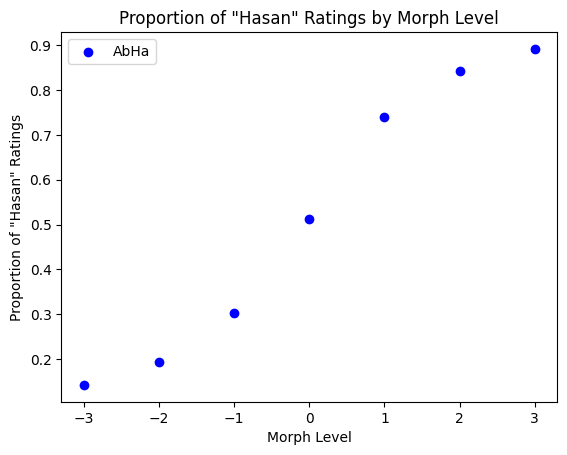

In [9]:

import matplotlib.pyplot as plt
counts['total'] = 0
# group the data by trialKeys and levelFace, and count the number of "Hasan" and "Goli" ratings
counts = data.groupby(['trialKeys', 'levelFace', 'srespChoice']).size().unstack(fill_value=0)
counts['total'] = counts.sum(axis=1)

# calculate the proportion of "Hasan" ratings
counts['hasan_prop'] = counts['Hasan'] / counts['total']

# reset the index to make trialKeys and levelFace columns
counts = counts.reset_index()

# create a scatter plot for each trial type

for trial, color in [('AbHa', 'blue'), ('MahGol', 'red')]:
    if trial == 'AbHa':
      subset = counts[counts['trialKeys'] == trial]
      plt.scatter(subset['levelFace'], subset['hasan_prop'], color=color, label=trial)
subset = counts[counts['trialKeys'] == 'AbHa']

# set plot title and axis labels
plt.title('Proportion of "Hasan" Ratings by Morph Level')
plt.xlabel('Morph Level')
plt.ylabel('Proportion of "Hasan" Ratings')
plt.legend()
plt.show()

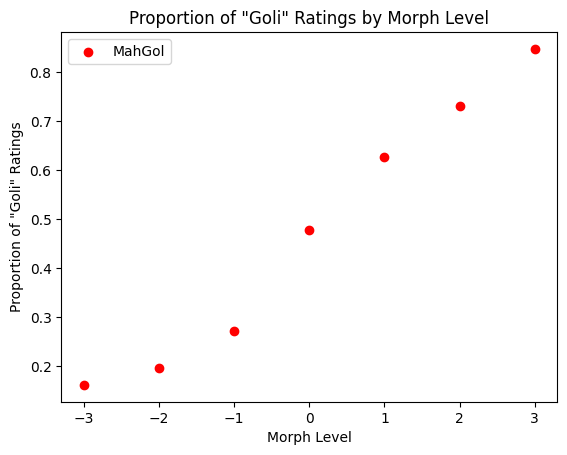

In [10]:
import matplotlib.pyplot as plt

# group the data by trialKeys and levelFace, and count the number of "Hasan" and "Goli" ratings
counts = data.groupby(['trialKeys', 'levelFace', 'srespChoice']).size().unstack(fill_value=0)
counts['total'] = counts.sum(axis=1)

# calculate the proportion of "Goli" ratings
counts['goli_prop'] = counts['Goli'] / counts['total']

# reset the index to make trialKeys and levelFace columns
counts = counts.reset_index()

# create a scatter plot
for trial, color in [('AbHa', 'blue'), ('MahGol', 'red')]:
    if trial == 'MahGol':
      subset = counts[counts['trialKeys'] == trial]
      plt.scatter(subset['levelFace'], subset['goli_prop'], color=color, label=trial)

plt.title('Proportion of "Goli" Ratings by Morph Level')
plt.xlabel('Morph Level')
plt.ylabel('Proportion of "Goli" Ratings')
plt.legend()
plt.show()


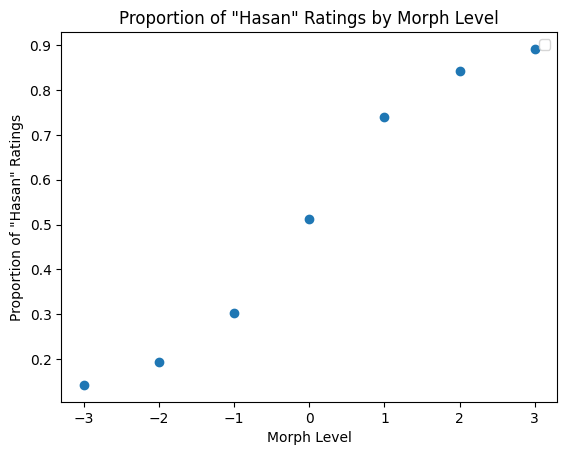

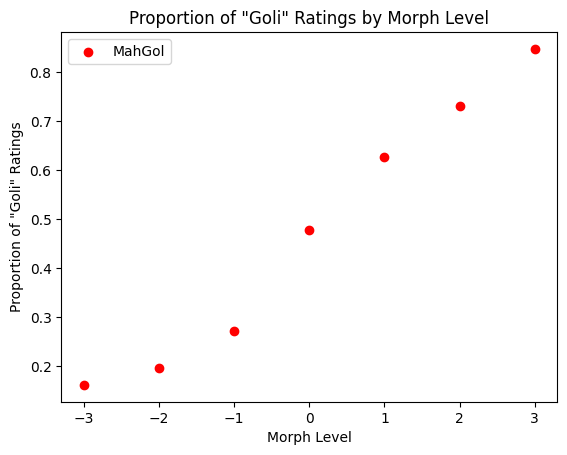

In [11]:
import matplotlib.pyplot as plt

# create a list of trialKeys and levelFace pairs
pairs = [('AbHa', -3), ('AbHa', -2), ('AbHa', -1), ('AbHa', 0), ('AbHa', 1), ('AbHa', 2), ('AbHa', 3),
         ('MahGol', -3), ('MahGol', -2), ('MahGol', -1), ('MahGol', 0), ('MahGol', 1), ('MahGol', 2), ('MahGol', 3)]

# create lists to store the x and y values for each pair
hasan_x_values = []
hasan_y_values = []

goli_x_values = []
goli_y_values = []

# loop through each pair and calculate the proportion of "Hasan" ratings
for pair in pairs:
    # filter the data by trialKeys and levelFace
    filtered_data = data[(data['trialKeys'] == pair[0]) & (data['levelFace'] == pair[1])]
    
    # count the number of "Hasan" and "Goli" ratings
    hasan_count = filtered_data['srespChoice'].value_counts()['Hasan'] if 'Hasan' in filtered_data['srespChoice'].value_counts() else 0
    goli_count = filtered_data['srespChoice'].value_counts()['Goli'] if 'Goli' in filtered_data['srespChoice'].value_counts() else 0
    Abbas_count = filtered_data['srespChoice'].value_counts()['Abbas'] if 'Abbas' in filtered_data['srespChoice'].value_counts() else 0
    Mahnaz_count = filtered_data['srespChoice'].value_counts()['Mahnaz'] if 'Mahnaz' in filtered_data['srespChoice'].value_counts() else 0


    if pair[0] == 'AbHa':
        # calculate the proportion of "Hasan" ratings
        hasan_total_count = hasan_count + Abbas_count
        hasan_proportion = hasan_count / hasan_total_count
        # add the x and y values to the lists
        hasan_x_values.append(pair[1])
        hasan_y_values.append(hasan_proportion)
    elif pair[0] == 'MahGol':
        # calculate the proportion of "Goli" ratings
        goli_total_count = Mahnaz_count + goli_count
        goli_proportion = goli_count / goli_total_count
        # add the x and y values to the lists
        goli_x_values.append(pair[1])
        goli_y_values.append(goli_proportion)
    
# create the scatter plot
plt.scatter(hasan_x_values, hasan_y_values)
plt.title('Proportion of "Hasan" Ratings by Morph Level')
plt.xlabel('Morph Level')
plt.ylabel('Proportion of "Hasan" Ratings')
plt.legend()
plt.show()

# create the scatter plot
plt.scatter(goli_x_values, goli_y_values, color='red', label='MahGol')
plt.title('Proportion of "Goli" Ratings by Morph Level')
plt.xlabel('Morph Level')
plt.ylabel('Proportion of "Goli" Ratings')
plt.legend()
plt.show()


<font color="#F4BB44"><h3>Fitted Figure</h3></font>


---



<font color="#F4BB44"><h3>Sigmoid function</h3></font>

<font color="#F4BB44"><h3>Hassan</h3></font>


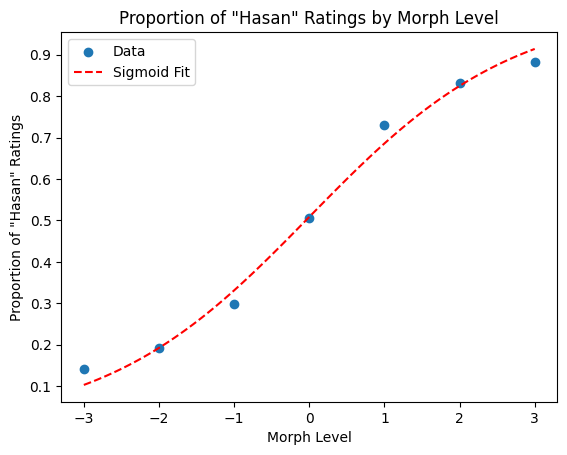

Sensitivity Parameter (beta): 0.728110538044401


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# load the data from the Google Drive link
url = 'https://drive.google.com/u/0/uc?id=1G_j5Btejbt8Rl8sKt0-epRsXkedghqJA&export=download'
data = pd.read_csv(url)

# define the sigmoid function
def sigmoid(x, beta, alpha):
    y = alpha / (1 + np.exp(-beta*(x)))
    return y

# create a list of trialKeys and levelFace pairs
pairs = [('AbHa', -3), ('AbHa', -2), ('AbHa', -1), ('AbHa', 0), ('AbHa', 1), ('AbHa', 2), ('AbHa', 3)]

# create lists to store the x and y values for each pair
x_values = []
y_values = []

# loop through each pair and calculate the proportion of "Hasan" ratings
for pair in pairs:
    # filter the data by trialKeys and levelFace
    filtered_data = data[(data['trialKeys'] == pair[0]) & (data['levelFace'] == pair[1])]
    
    # count the number of "Hasan" ratings
    hasan_count = filtered_data['srespChoice'].value_counts()['Hasan'] if 'Hasan' in filtered_data['srespChoice'].value_counts() else 0
    total_count = len(filtered_data)
    
    # calculate the proportion of "Hasan" ratings
    hasan_proportion = hasan_count / total_count
    
    # add the x and y values to the lists
    x_values.append(pair[1])
    y_values.append(hasan_proportion)

# fit the sigmoid function to the data
popt, pcov = curve_fit(sigmoid, x_values, y_values)

# create a range of x values for the curve
x_curve = np.linspace(min(x_values), max(x_values), 100)

# calculate the y values for the curve using the fitted parameters
y_curve = sigmoid(x_curve, *popt)

# plot the data and the fitted curve
plt.scatter(x_values, y_values, label='Data')
plt.plot(x_curve, y_curve, 'r--', label='Sigmoid Fit')
plt.title('Proportion of "Hasan" Ratings by Morph Level')
plt.xlabel('Morph Level')
plt.ylabel('Proportion of "Hasan" Ratings')
plt.legend()
plt.show()

# print the value of the sensitivity parameter
print('Sensitivity Parameter (beta):', popt[0])


<font color="#F4BB44"><h3>Gussian Sigmoid Function</h3></font>

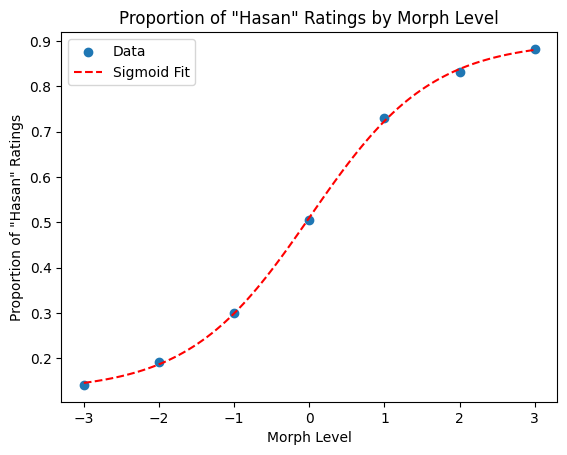

Sensitivity Parameter (beta): 0.7716305107903216


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# load the data from the Google Drive link
url = 'https://drive.google.com/u/0/uc?id=1G_j5Btejbt8Rl8sKt0-epRsXkedghqJA&export=download'
data = pd.read_csv(url)

# define the sigmoid function
def sigmoid(x, alpha, beta, gamma, landa):
    return alpha / (1 + np.exp(-beta * (x - gamma))) + landa

# create a list of trialKeys and levelFace pairs
pairs = [('AbHa', -3), ('AbHa', -2), ('AbHa', -1), ('AbHa', 0), ('AbHa', 1), ('AbHa', 2), ('AbHa', 3)]

# create lists to store the x and y values for each pair
x_values = []
y_values = []

# loop through each pair and calculate the proportion of "Hasan" ratings
for pair in pairs:
    # filter the data by trialKeys and levelFace
    filtered_data = data[(data['trialKeys'] == pair[0]) & (data['levelFace'] == pair[1])]
    
    # count the number of "Hasan" ratings
    hasan_count = filtered_data['srespChoice'].value_counts()['Hasan'] if 'Hasan' in filtered_data['srespChoice'].value_counts() else 0
    total_count = len(filtered_data)
    goli_count = filtered_data['srespChoice'].value_counts()['Goli'] if 'Goli' in filtered_data['srespChoice'].value_counts() else 0
    total_count = len(filtered_data)
    
    # calculate the proportion of "Hasan" ratings
    hasan_proportion = hasan_count / total_count
    
    # add the x and y values to the lists
    x_values.append(pair[1])
    y_values.append(hasan_proportion)

# fit the sigmoid function to the data
popt, pcov = curve_fit(sigmoid, x_values, y_values)

# create a range of x values for the curve
x_curve = np.linspace(min(x_values), max(x_values), 100)

# calculate the y values for the curve using the fitted parameters
y_curve = sigmoid(x_curve, *popt)

# plot the data and the fitted curve
plt.scatter(x_values, y_values, label='Data')
plt.plot(x_curve, y_curve, 'r--', label='Sigmoid Fit')
plt.title('Proportion of "Hasan" Ratings by Morph Level')
plt.xlabel('Morph Level')
plt.ylabel('Proportion of "Hasan" Ratings')
plt.legend()
plt.show()

# print the value of the sensitivity parameter
print('Sensitivity Parameter (beta):', popt[0])


<font color="#F4BB44"><h3>Goli</h3></font>

---

<font color="#F4BB44"><h3>Sigmoid Function</h3></font>

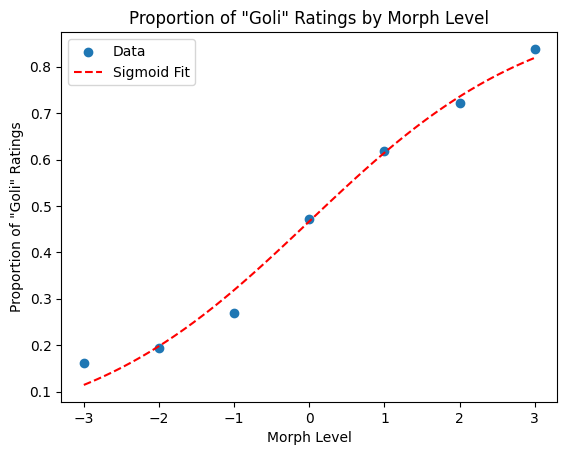

Sensitivity Parameter (beta) = 0.9333800872317827


In [14]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# load the data
url = "https://drive.google.com/u/0/uc?id=1G_j5Btejbt8Rl8sKt0-epRsXkedghqJA&export=download"
data = pd.read_csv(url)

# filter the data by trialKeys = "MahGol"
goli_data = data[data['trialKeys'] == 'MahGol']

# calculate the proportion of "Goli" ratings for each morph level
morph_levels = np.sort(goli_data['levelFace'].unique())
goli_proportions = []
for level in morph_levels:
    level_data = goli_data[goli_data['levelFace'] == level]
    goli_count = (level_data['srespChoice'] == 'Goli').sum()
    total_count = len(level_data)
    goli_proportion = goli_count / total_count
    goli_proportions.append(goli_proportion)

# define the sigmoid function
def sigmoid(x, alpha, beta):
    y = alpha / (1 + np.exp(-beta*(x)))
    return y

# fit the sigmoid function to the data
popt, pcov = curve_fit(sigmoid, morph_levels, goli_proportions, p0=[0.5, 0], method='lm', maxfev=4000)


# create a range of x values for the curve
x_curve = np.linspace(min(morph_levels), max(x_values), 100)

# calculate the y values for the curve using the fitted parameters
y_curve = sigmoid(x_curve, *popt)

# plot the data and the fitted curve
plt.scatter(morph_levels, goli_proportions, label='Data')
# plt.plot(morph_levels, sigmoid(morph_levels, *popt), 'r-', label='Fit')
plt.plot(x_curve, y_curve, 'r--', label='Sigmoid Fit')
plt.title('Proportion of "Goli" Ratings by Morph Level')
plt.xlabel('Morph Level')
plt.ylabel('Proportion of "Goli" Ratings')
plt.legend()
plt.show()

# print the sensitivity parameter beta
print('Sensitivity Parameter (beta) =', popt[0])


<font color="#F4BB44"><h3>Gussian Sigmoid Function</h3></font>

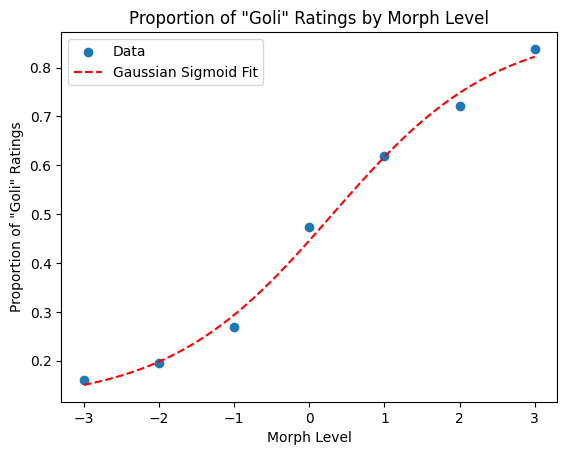

Sensitivity Parameter (beta) = 0.7674707931366301


In [15]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# load the data
url = "https://drive.google.com/u/0/uc?id=1G_j5Btejbt8Rl8sKt0-epRsXkedghqJA&export=download"
data = pd.read_csv(url)

# filter the data by trialKeys = "MahGol"
goli_data = data[data['trialKeys'] == 'MahGol']

# calculate the proportion of "Goli" ratings for each morph level
morph_levels = np.sort(goli_data['levelFace'].unique())
goli_proportions = []
for level in morph_levels:
    level_data = goli_data[goli_data['levelFace'] == level]
    goli_count = (level_data['srespChoice'] == 'Goli').sum()
    total_count = len(level_data)
    goli_proportion = goli_count / total_count
    goli_proportions.append(goli_proportion)

# define the gaussian_sigmoid function
def gaussian_sigmoid(x, alpha, beta, gamma, landa):
    return alpha / (1 + np.exp(-beta * (x - gamma))) + landa

# fit the sigmoid function to the data
popt, pcov = curve_fit(gaussian_sigmoid, morph_levels, goli_proportions, p0=[0.5, 0, 1, 0.5], method='lm', maxfev=4000)


# create a range of x values for the curve
x_curve = np.linspace(min(morph_levels), max(x_values), 100)

# calculate the y values for the curve using the fitted parameters
y_curve = gaussian_sigmoid(x_curve, *popt)

# plot the data and the fitted curve
plt.scatter(morph_levels, goli_proportions, label='Data')
# plt.plot(morph_levels, gaussian_sigmoid(morph_levels, *popt), 'r-', label='Fit')
plt.plot(x_curve, y_curve, 'r--', label='Gaussian Sigmoid Fit')
plt.title('Proportion of "Goli" Ratings by Morph Level')
plt.xlabel('Morph Level')
plt.ylabel('Proportion of "Goli" Ratings')
plt.legend()
plt.show()

# print the sensitivity parameter beta
print('Sensitivity Parameter (beta) =', popt[0])


<font color="#F4BB44"><h3>Hassan</h3></font>

In [16]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# load the data
url = "https://drive.google.com/u/0/uc?id=1G_j5Btejbt8Rl8sKt0-epRsXkedghqJA&export=download"
data = pd.read_csv(url)

# define the sigmoid function
def sigmoid(x, alpha, beta):
    y = alpha / (1 + np.exp(-beta*(np.array(x))))
    return y


# define the Gaussian sigmoid function
def gauss_sigmoid(x, alpha, beta, gamma, landa):
    return alpha / (1 + np.exp(-beta * (x - gamma))) + landa

# Define the function to calculate the negative log-likelihood
def neg_log_likelihood(params, x, y, func):
    y_pred = func(x, *params)
    neg_ll = -np.sum(np.log(np.array(y_pred)) * np.array(y) + np.log(1-np.array(y_pred)) * (1-np.array(y)))
    return neg_ll



# create a list of trialKeys and levelFace pairs
pairs = [('AbHa', -3), ('AbHa', -2), ('AbHa', -1), ('AbHa', 0), ('AbHa', 1), ('AbHa', 2), ('AbHa', 3)]

# create lists to store the x and y values for each pair
x = []
y = []

# loop through each pair and calculate the proportion of "Hasan" ratings
for pair in pairs:
    # filter the data by trialKeys and levelFace
    filtered_data = data[(data['trialKeys'] == pair[0]) & (data['levelFace'] == pair[1])]
    
    # count the number of "Hasan" ratings
    hasan_count = filtered_data['srespChoice'].value_counts()['Hasan'] if 'Hasan' in filtered_data['srespChoice'].value_counts() else 0
    total_count = len(filtered_data)
    goli_count = filtered_data['srespChoice'].value_counts()['Goli'] if 'Goli' in filtered_data['srespChoice'].value_counts() else 0
    total_count = len(filtered_data)
    
    # calculate the proportion of "Hasan" ratings
    hasan_proportion = hasan_count / total_count
    
    # add the x and y values to the lists
    x.append(pair[1])
    y.append(hasan_proportion)



# Fit the sigmoid model and calculate the AIC and BIC scores
# x = data["morphing"]
# y = data["response"]
popt_sig, _ = curve_fit(sigmoid, x, y, p0=[0.5, 0], method='lm')
nll_sig = neg_log_likelihood(popt_sig, x, y, sigmoid)
k_sig = 3
n = len(x)
aic_sig = 2*k_sig - 2*nll_sig
bic_sig = k_sig*np.log(n) - 2*nll_sig

# Fit the Gaussian CDF model and calculate the AIC and BIC scores
popt_gauss, _ = curve_fit(gauss_sigmoid, x, y)
nll_gauss = neg_log_likelihood(popt_gauss, x, y, gauss_sigmoid)
k_gauss = 3
aic_gauss = 2*k_gauss - 2*nll_gauss
bic_gauss = k_gauss*np.log(n) - 2*nll_gauss

# Print the results
print("Sigmoid model:")
print(f"Parameters: {popt_sig}")
print(f"AIC: {aic_sig*100:.2f}")
print(f"BIC: {bic_sig*100:.2f}")
print("")
print("Gaussian Sigmoid model:")
print(f"Parameters: {popt_gauss}")
print(f"AIC: {aic_gauss*100:.2f}")
print(f"BIC: {bic_gauss*100:.2f}")


Sigmoid model:
Parameters: [1.01666258 0.72811132]
AIC: -123.65
BIC: -139.88

Gaussian Sigmoid model:
Parameters: [0.77163051 1.23581573 0.01305661 0.12741509]
AIC: -119.71
BIC: -135.93


<font color="#F4BB44"><h3>Goli</h3></font>

In [17]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# load the data
url = "https://drive.google.com/u/0/uc?id=1G_j5Btejbt8Rl8sKt0-epRsXkedghqJA&export=download"
data = pd.read_csv(url)

# create a list of trialKeys and levelFace pairs
pairs = [('AbHa', -3), ('AbHa', -2), ('AbHa', -1), ('AbHa', 0), ('AbHa', 1), ('AbHa', 2), ('AbHa', 3)]

# create lists to store the x and y values for each pair
x = []
y = []

# define the sigmoid function
def sigmoid(x, alpha, beta):
    y = alpha / (1 + np.exp(-beta*(np.array(x))))
    return y


# define the Gaussian sigmoid function
def gauss_sigmoid(x, alpha, beta, gamma, landa):
    return alpha / (1 + np.exp(-beta * (x - gamma))) + landa

# Define the function to calculate the negative log-likelihood
def neg_log_likelihood(params, x, y, func):
    y_pred = func(x, *params)
    neg_ll = -np.sum(np.log(np.array(y_pred)) * np.array(y) + np.log(1-np.array(y_pred)) * (1-np.array(y)))
    return neg_ll

# filter the data by trialKeys = "MahGol"
goli_data = data[data['trialKeys'] == 'MahGol']

# calculate the proportion of "Goli" ratings for each morph level
morph_levels = np.sort(goli_data['levelFace'].unique())
goli_proportions = []
for level in morph_levels:
    level_data = goli_data[goli_data['levelFace'] == level]
    goli_count = (level_data['srespChoice'] == 'Goli').sum()
    total_count = len(level_data)
    goli_proportion = goli_count / total_count
    goli_proportions.append(goli_proportion)
    # add the x and y values to the lists
    x.append(pair[1])
    y = goli_proportions

# Fit the sigmoid model and calculate the AIC and BIC scores
# x = data["morphing"]
# y = data["response"]
popt_sig, _ = curve_fit(sigmoid, x, y, p0=[0.5, 0], method='lm')
nll_sig = neg_log_likelihood(popt_sig, x, y, sigmoid)
k_sig = 3
n = len(x)
aic_sig = 2*k_sig - 2*nll_sig
bic_sig = k_sig*np.log(n) - 2*nll_sig

# Fit the Gaussian CDF model and calculate the AIC and BIC scores
popt_gauss, _ = curve_fit(gauss_sigmoid, x, y)
nll_gauss = neg_log_likelihood(popt_gauss, x, y, gauss_sigmoid)
k_gauss = 3
aic_gauss = 2*k_gauss - 2*nll_gauss
bic_gauss = k_gauss*np.log(n) - 2*nll_gauss

# Print the results
print("Sigmoid model:")
print(f"Parameters: {popt_sig}")
print(f"AIC: {aic_sig*10:.2f}")
print(f"BIC: {bic_sig*10:.2f}")
print("")
print("Gaussian Sigmoid model:")
print(f"Parameters: {popt_gauss}")
print(f"AIC: {aic_gauss*10:.2f}")
print(f"BIC: {bic_gauss*10:.2f}")

Sigmoid model:
Parameters: [0.9360119 0.       ]
AIC: -36.75
BIC: -38.38

Gaussian Sigmoid model:
Parameters: [ 1.00548513 -5.91154434 -4.2421799   0.46800595]
AIC: -36.75
BIC: -38.38


<ipython-input-17-103c72f07c4e>:24: RuntimeWarning: overflow encountered in exp
  return alpha / (1 + np.exp(-beta * (x - gamma))) + landa
/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


<font color="#F4BB44"><h3>curve fitting use AIC and BIC metrics</h3></font>

In [18]:
def BIC(n_params,x,y): 
  N = len(x)
  RSS = ((x-y)**2).sum()
  return N*np.log(RSS/N) + n_params*np.log(N)

def sigmoid(x, alpha, beta):
    return 1 / (1 + np.exp(-alpha * (x - beta)))


def least_squares_error(y, y_pred):
    return np.sum((y - y_pred) ** 2)

def fit_sigmoid(data):

    grouped_data = data.groupby(["levelFace", "levelFreq"])
    n_hasan = np.zeros((7, 3))
    n_goli = np.zeros((7, 3))

    for name, group in grouped_data:
        i = name[0] + 3
        j = {"IF": 0, "LF": 1, "HF": 2}[name[1]]
        n_hasan[i, j] = np.sum(group["srespChoice"] == "Hasan")
        n_goli[i, j] = np.sum(group["srespChoice"] == "Goli")

    x = np.linspace(-3, 3, 21)
    y_hasan = n_hasan.flatten()
    y_goli = n_goli.flatten()


     # fit curve on datas

    popt_hasan, _ = curve_fit(sigmoid, x, y_hasan)
    popt_goli, _ = curve_fit(sigmoid, x, y_goli)

    beta_hasan = popt_hasan[1]
    beta_goli = popt_goli[1]
 


    n_params = 2
    n_samples_hassan = len(y_hasan)
    n_samples_goli = len(y_goli)
    ll_hasan = np.sum(np.log(sigmoid(x, *popt_hasan)) * y_hasan + np.log(1 - sigmoid(x, *popt_hasan)) * (n_samples_hassan - y_hasan))
    ll_goli = np.sum(np.log(sigmoid(x, *popt_goli)) * y_goli + np.log(1 - sigmoid(x, *popt_goli)) * (n_samples_goli - y_goli))
    aic_hasan_metric = 2 * n_params - 2 * ll_hasan
    aic_goli_metric= 2 * n_params - 2 * ll_goli
    bic_hasan_metric = n_params * np.log(n_samples_hassan) - 2 * ll_hasan
    bic_goli_metric = n_params * np.log(n_samples_goli) - 2 * ll_goli

    # print AIC and BIC

    bic_hassan = BIC(n_params,x,y_hasan)
    bic_goli = BIC(n_params,x,y_goli)

    print(bic_hassan)
    print(bic_goli)

    print("Sensitivity for Hasan: {:.2f}".format(beta_hasan))
    print("Sensitivity for Goli: {:.2f}".format(beta_goli))
    print("AIC for Hasan: {:.2f}".format(aic_hasan_metric))
    print("AIC for Goli: {:.2f}".format(aic_goli_metric))
    print("BIC for Hasan: {:.2f}".format(bic_hasan_metric))
    print("BIC for Goli: {:.2f}".format(bic_goli_metric))

In [19]:
fit_sigmoid(data)

282.1860174567594
278.28027158474185
Sensitivity for Hasan: -142.05
Sensitivity for Goli: -142.63
AIC for Hasan: -inf
AIC for Goli: -inf
BIC for Hasan: -inf
BIC for Goli: -inf


/usr/local/lib/python3.9/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
<ipython-input-18-407a6181631e>:43: RuntimeWarning: divide by zero encountered in log
  ll_hasan = np.sum(np.log(sigmoid(x, *popt_hasan)) * y_hasan + np.log(1 - sigmoid(x, *popt_hasan)) * (n_samples_hassan - y_hasan))
<ipython-input-18-407a6181631e>:44: RuntimeWarning: divide by zero encountered in log
  ll_goli = np.sum(np.log(sigmoid(x, *popt_goli)) * y_goli + np.log(1 - sigmoid(x, *popt_goli)) * (n_samples_goli - y_goli))


<font color="#F4BB44"><h3>Part 2)</h3></font>


<font color="#F4BB44"><h3>Test Hypotheses</h3></font>

In [20]:
def sigmoid(x, alpha, beta):
    return alpha / (1 + np.exp(-beta*x))


def Ztest(p1, n1, p2, n2):
    p_pool = (n1 * p1 + n2 * p2) / (n1 + n2)
    se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
    z = abs(p1 - p2) / se
    p_values = norm.sf(abs(z)) * 2
    return p_values


def add_result_col_to_Data(row):
    if row['levelFace'] == 0:
        return 1
    elif row['levelFace'] > 0:
        if row['trialKeys'] == 'MahGol' and row['srespChoice'] == 'Goli':
            return 1
        elif row['trialKeys'] == 'AbHa' and row['srespChoice'] == 'Hasan':
            return 1
        else:
            return 0
    elif row['levelFace'] < 0:
        if row['trialKeys'] == 'MahGol' and row['srespChoice'] == 'Goli':
            return 0
        elif row['trialKeys'] == 'AbHa' and row['srespChoice'] == 'Hasan':
            return 0
        else:
            return 1



def hetro_homo(row):
    if ((row['sex'] == 'M' and row['trialKeys'] == 'AbHa') or (row['sex']=='F' and row['trialKeys'] == 'MahGol')):
        return 'homo'
    return 'hetro'


def domm_func(row):
    if row['dom'] == 'R' and row['Hand'] == 'Right':
        return 1
    elif row['dom'] == 'L' and row['Hand'] == 'Left':
        return 1
    return 0


<font color="#F4BB44"><h3>hypotheses 1 ◀ frequency *level*</h3></font>


beta
[1.4401525335783758]
AUC score
0.8690378289473684
beta
[1.4401525335783758, 0.5184904889641667]
AUC score
0.7458196271929827
beta
[1.4401525335783758, 0.5184904889641667, 0.4024688411001252]
AUC score
0.7121025219298246


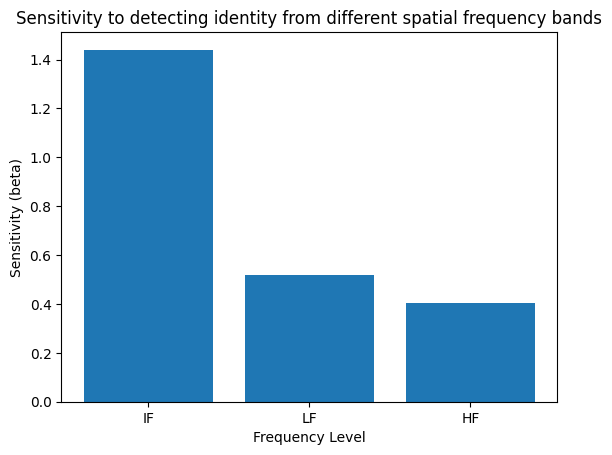

In [22]:
from sklearn.metrics import roc_auc_score

data = pd.read_csv('/content/data.csv')
freq_levels = ['IF', 'LF', 'HF']
data_freqLevel = {level: data[data.levelFreq==level] for level in freq_levels}
# print(data_freqLevel)


# fit sigmoid on sorted data
betas = []

for level in freq_levels:
    x = data_freqLevel[level]['levelFace']
    y = (data_freqLevel[level]['srespChoice'] == 'Goli') 
    popt, pcov = curve_fit(sigmoid, x, y)
    betas.append(popt[1])
    label=[]
    pred=[]
    xx= data[data['levelFreq']==level]
    for index, row in xx.iterrows():
      if row['levelFace']>0:
        label.append(1)
        if row['srespChoice'] in ['Hasan','Goli']:
          pred.append(1)
        else:
          pred.append(0)
      if row['levelFace']<0:
        label.append(0)
        if row['srespChoice'] in ['Abbas','Mahnaz']:
          pred.append(0)
        else:
          pred.append(1)

    auc = roc_auc_score(label, pred)
    print("beta")
    print(betas)
    print("AUC score")
    print(auc)
# plot Beta coeff in bar plot

plt.bar(freq_levels, betas)
plt.xlabel('Frequency Level')
plt.ylabel('Sensitivity (beta)')
plt.title('Sensitivity to detecting identity from different spatial frequency bands')
plt.show()

In [23]:
data['res'] = data.apply(add_result_col_to_Data, axis=1)
success = data.groupby(['levelFreq']).sum()
total = data.groupby(['levelFreq']).count()

HF_s, HF_total = success['res'].loc['HF'], total['res'].loc['HF']
LF_s, LF_total = success['res'].loc['LF'], total['res'].loc['LF']
IF_s, IF_total = success['res'].loc['IF'], total['res'].loc['IF']

<font color="#F4BB44"><h3>Z test analysis</h3></font>


In [24]:
x1, x2, x3 = Ztest(HF_s/HF_total, HF_total, LF_s/LF_total, LF_total), HF_s/HF_total, LF_s/LF_total
print('p-value for  HF and LF: ' + str(x1))
print('HF: ' + str(x2))
print('LF : ' + str(x3))

p-value for  HF and LF: 2.0288047811034525e-10
HF: 0.7579299812030075
LF : 0.7868303571428571


In [25]:
x1, x2, x3 = Ztest(HF_s/HF_total, HF_total, IF_s/IF_total, IF_total), HF_s/HF_total, IF_s/IF_total
print('p-value for  HF and LF: ' + str(x1))
print('HF: ' + str(x2))
print('LF : ' + str(x3))

p-value for  HF and LF: 2.1071044722879627e-228
HF: 0.7579299812030075
LF : 0.8909774436090225


In [26]:
x1, x2, x3 = Ztest(LF_s/LF_total, LF_total, IF_s/IF_total, IF_total), LF_s/LF_total, IF_s/IF_total
print('p-value for  HF and LF: ' + str(x1))
print('HF: ' + str(x2))
print('LF : ' + str(x3))

p-value for  HF and LF: 1.3665226565283558e-150
HF: 0.7868303571428571
LF : 0.8909774436090225


<font color="#F4BB44"><h3>hypothesis # 2 : Identifying images of conspecific or heterospecific gender</h3></font>

beta
[0.5921940447891488]
AUC score
0.7522467320261438
beta
[0.5921940447891488, 0.6851745514520942]
AUC score
0.7895833333333333


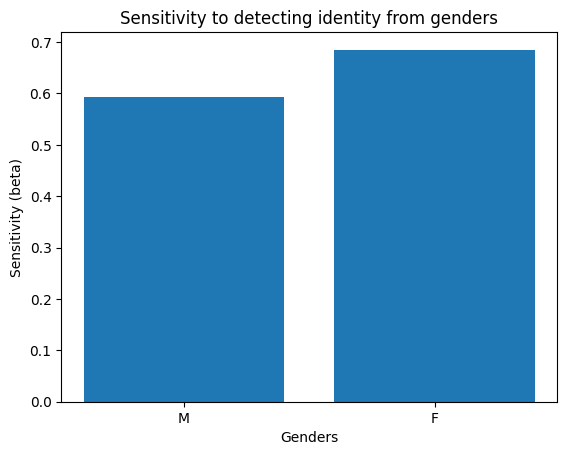

In [27]:
data = pd.read_csv('/content/merged_data.csv', on_bad_lines='skip')

sex = ['M', 'F']
data_sex = {level: data[data.sex==level] for level in sex}
# print(data_sex)

# fit sigmoid on sorted data
betas = []
for level in sex:
    x = data_sex[level]['levelFace']
    y = data_sex[level]['srespChoice'] == 'Goli'
    popt, pcov = curve_fit(sigmoid, x, y)
    betas.append(popt[1])
    label=[]
    pred=[]
    xx= data[data['sex']==level]
    for index, row in xx.iterrows():
      if row['levelFace']>0:
        label.append(1)
        if row['srespChoice'] in ['Hasan','Goli']:
          pred.append(1)
        else:
          pred.append(0)
      if row['levelFace']<0:
        label.append(0)
        if row['srespChoice'] in ['Abbas','Mahnaz']:
          pred.append(0)
        else:
          pred.append(1)

    auc = roc_auc_score(label, pred)
    print("beta")
    print(betas)
    print("AUC score")
    print(auc)

# plot Beta coeff in bar plot

plt.bar(sex, betas)
plt.xlabel('Genders')
plt.ylabel('Sensitivity (beta)')
plt.title('Sensitivity to detecting identity from genders')
plt.show()

beta
[0.5889951877507543]
AUC score
0.7522467320261438
beta
[0.5889951877507543, 0.8574595998887298]
AUC score
0.7895833333333333


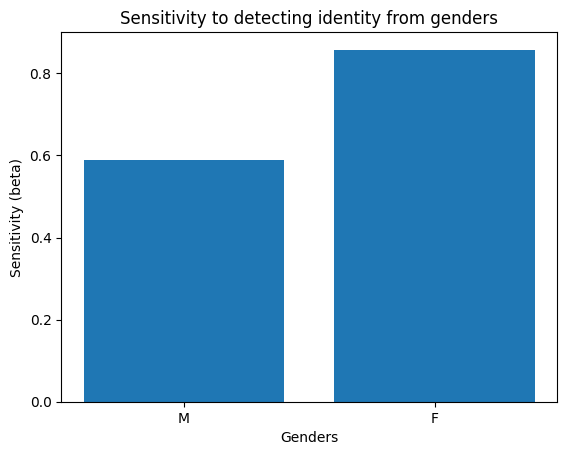

In [28]:
# fit sigmoid on sorted data
betas = []
for level in sex:
    x = data_sex[level]['levelFace']
    y = data_sex[level]['srespChoice'] == 'Hasan'
    popt, pcov = curve_fit(sigmoid, x, y)
    betas.append(popt[1])
    label=[]
    pred=[]
    xx= data[data['sex']==level]
    for index, row in xx.iterrows():
      if row['levelFace']>0:
        label.append(1)
        if row['srespChoice'] in ['Hasan','Goli']:
          pred.append(1)
        else:
          pred.append(0)
      if row['levelFace']<0:
        label.append(0)
        if row['srespChoice'] in ['Abbas','Mahnaz']:
          pred.append(0)
        else:
          pred.append(1)

    auc = roc_auc_score(label, pred)
    print("beta")
    print(betas)
    print("AUC score")
    print(auc)

# plot Beta coeff in bar plot

plt.bar(sex, betas)
plt.xlabel('Genders')
plt.ylabel('Sensitivity (beta)')
plt.title('Sensitivity to detecting identity from genders')
plt.show()

<font color="#F4BB44"><h3>Z test analysis</h3></font>


In [29]:
data['gender'] = data.apply(hetro_homo, axis=1)
data['res'] = data.apply(add_result_col_to_Data, axis=1)

success = data.groupby(['gender']).sum()
total = data.groupby(['gender']).count()
hetro_s, hetro_total = success['res']['hetro'], total['res']['hetro']
homo_s ,homo_total = success['res']['homo'], total['res']['homo']

x1, y1, z1 = Ztest(hetro_s/hetro_total, hetro_total, homo_s/homo_total, homo_total), hetro_s/hetro_total, homo_s/homo_total
print('p-value for homo/hetro: ' + str(x1))
print('hetro probablity: ' + str(y1))
print('homo probablity: ' + str(z1))

p-value for homo/hetro: 4.405732809590035e-10
hetro probablity: 0.8224206349206349
homo probablity: 0.8008365508365508


<font color="#F4BB44"><h3>hypotheses 3 : Identifying images by left hand in level Freq</h3></font>

beta
[1.4493544011349229]
AUC score
0.871984649122807
beta
[1.4493544011349229, 1.4299351066314872]
AUC score
0.8660910087719298
beta
[0.5032179193579617]
AUC score
0.7457510964912281
beta
[0.5032179193579617, 0.5343072363308027]
AUC score
0.7458881578947367
beta
[0.38367797166801976]
AUC score
0.7103892543859649
beta
[0.38367797166801976, 0.4226499338692281]
AUC score
0.7138157894736843


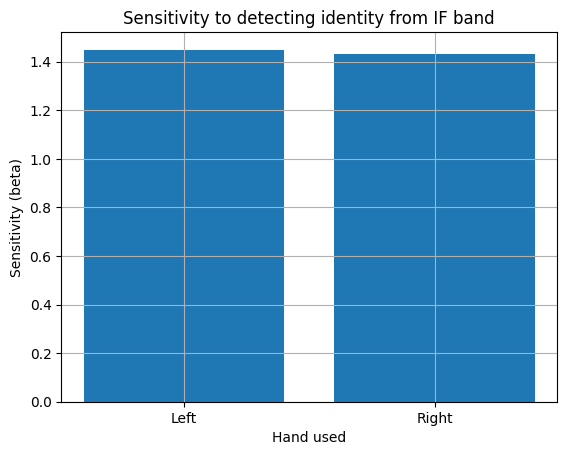

In [30]:
data_IF = data[data.levelFreq=='IF'] 
data_LF = data[data.levelFreq=='LF'] 
data_HF = data[data.levelFreq=='HF'] 

Hand_level = ['Left', 'Right']
data_IF_sorted = {level: data_IF[data_IF.Hand==level] for level in Hand_level}
data_LF_sorted = {level: data_LF[data_LF.Hand==level] for level in Hand_level}
data_HF_sorted = {level: data_HF[data_HF.Hand==level] for level in Hand_level}

# fit sigmoid on sorted data

betas_IF = []
for level in Hand_level:
    x = data_IF_sorted[level]['levelFace']
    y = data_IF_sorted[level]['srespChoice'] == 'Goli'
    popt, pcov = curve_fit(sigmoid, x, y)
    betas_IF.append(popt[1])
    label=[]
    pred=[]
    xx= data_IF[data_IF['Hand']==level]
    for index, row in xx.iterrows():
      if row['levelFace']>0:
        label.append(1)
        if row['srespChoice'] in ['Hasan','Goli']:
          pred.append(1)
        else:
          pred.append(0)
      if row['levelFace']<0:
        label.append(0)
        if row['srespChoice'] in ['Abbas','Mahnaz']:
          pred.append(0)
        else:
          pred.append(1)

    auc = roc_auc_score(label, pred)
    print("beta")
    print(betas_IF)
    print("AUC score")
    print(auc)

betas_LF = []
for level in Hand_level:
    x = data_LF_sorted[level]['levelFace']
    y = data_LF_sorted[level]['srespChoice'] == 'Goli'
    popt, pcov = curve_fit(sigmoid, x, y)
    betas_LF.append(popt[1])
    label=[]
    pred=[]
    xx= data_LF[data_LF['Hand']==level]
    for index, row in xx.iterrows():
      if row['levelFace']>0:
        label.append(1)
        if row['srespChoice'] in ['Hasan','Goli']:
          pred.append(1)
        else:
          pred.append(0)
      if row['levelFace']<0:
        label.append(0)
        if row['srespChoice'] in ['Abbas','Mahnaz']:
          pred.append(0)
        else:
          pred.append(1)

    auc = roc_auc_score(label, pred)
    print("beta")
    print(betas_LF)
    print("AUC score")
    print(auc)

betas_HF = []
for level in Hand_level:
    x = data_HF_sorted[level]['levelFace']
    y = data_HF_sorted[level]['srespChoice'] == 'Goli'
    popt, pcov = curve_fit(sigmoid, x, y)
    betas_HF.append(popt[1])
    label=[]
    pred=[]
    xx= data_HF[data_HF['Hand']==level]
    for index, row in xx.iterrows():
      if row['levelFace']>0:
        label.append(1)
        if row['srespChoice'] in ['Hasan','Goli']:
          pred.append(1)
        else:
          pred.append(0)
      if row['levelFace']<0:
        label.append(0)
        if row['srespChoice'] in ['Abbas','Mahnaz']:
          pred.append(0)
        else:
          pred.append(1)

    auc = roc_auc_score(label, pred)
    print("beta")
    print(betas_HF)
    print("AUC score")
    print(auc)

# plot Beta coeff in bar plot

plt.bar(Hand_level, betas_IF)
plt.grid()
plt.xlabel('Hand used')
plt.ylabel('Sensitivity (beta)')
plt.title('Sensitivity to detecting identity from IF band')
plt.show()


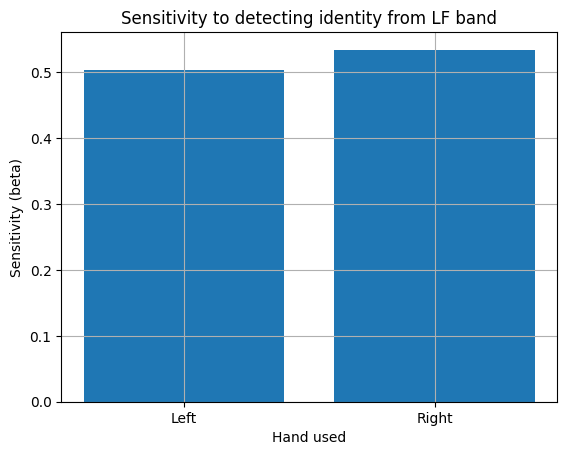

In [31]:
plt.bar(Hand_level, betas_LF)
plt.grid()
plt.xlabel('Hand used')
plt.ylabel('Sensitivity (beta)')
plt.title('Sensitivity to detecting identity from LF band')
plt.show()

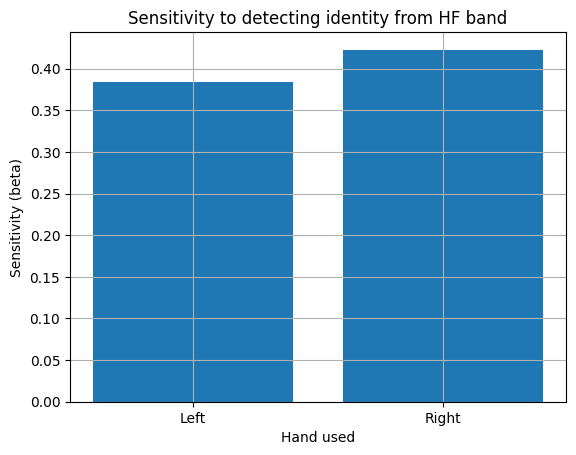

In [32]:
plt.bar(Hand_level, betas_HF)
plt.grid()
plt.xlabel('Hand used')
plt.ylabel('Sensitivity (beta)')
plt.title('Sensitivity to detecting identity from HF band')
plt.show()

In [33]:
data['result'] = data.apply(add_result_col_to_Data, axis=1)
success = data.groupby(['Hand', 'levelFreq']).sum()
total = data.groupby(['Hand', 'levelFreq']).count()

L_HF_s, L_HF_total = success['result'].loc['Left','HF'], total['result'].loc['Left','HF']
R_HF_s, R_HF_total = success['result'].loc['Right','HF'], total['result'].loc['Right','HF']
L_LF_s, L_LF_total = success['result'].loc['Left','LF'], total['result'].loc['Left','LF']
R_LF_s, R_LF_total = success['result'].loc['Right','LF'], total['result'].loc['Right','LF']
L_IF_s, L_IF_total = success['result'].loc['Left','IF'], total['result'].loc['Left','IF']
R_IF_s, R_IF_total = success['result'].loc['Right','IF'], total['result'].loc['Right','IF']

<font color="#F4BB44"><h3>Z test analysis</h3></font>


In [34]:
p_value, p1, p2 = Ztest(R_HF_s/R_HF_total, R_HF_total, L_HF_s/L_HF_total, L_HF_total), R_HF_s/R_HF_total, L_HF_s/L_HF_total
print('p-value Right and Left hand HF: ' + str(p_value))
print('Right hand HF probality: ' + str(p1))
print('Left hand HF probality: ' + str(p2))

p-value Right and Left hand HF: 0.6290161441255026
Right hand HF probality: 0.759515977443609
Left hand HF probality: 0.7563439849624061


In [35]:
p_value, p1, p2 = Ztest(R_LF_s/R_LF_total, R_LF_total, L_LF_s/L_LF_total, L_LF_total), R_LF_s/R_LF_total, L_LF_s/L_LF_total
print('p-value Right and Left hand LF: ' + str(p_value))
print('Right hand LF probality: ' + str(p1))
print('Left hand LF probality: ' + str(p2))

p-value Right and Left hand LF: 0.8369052039454088
Right hand LF probality: 0.7874765037593985
Left hand LF probality: 0.7861842105263158


In [36]:
p_value, p1, p2 = Ztest(R_IF_s/R_IF_total, R_IF_total, L_IF_s/L_IF_total, L_IF_total), R_IF_s/R_IF_total, L_IF_s/L_IF_total
print('p-value Right and Left hand IF: ' + str(p_value))
print('Right hand IF probality: ' + str(p1))
print('Left hand IF probality: ' + str(p2))

p-value Right and Left hand IF: 0.35006606095978343
Right hand IF probality: 0.8887453007518797
Left hand IF probality: 0.8932095864661654


<font color="#F4BB44"><h3>hypotheses 4 : determine in a specific spectral band when we use dominant hand</h3></font>


beta
[0.9999999955180757]
AUC score
0.8690378289473684
beta
[0.9999999955180757, 0.9999999949538131]
AUC score
0.7458196271929827
beta
[0.9999999955180757, 0.9999999949538131, 0.9999999944822943]
AUC score
0.7121025219298246


Text(0.5, 1.0, 'Sensitivity to dominant hand')

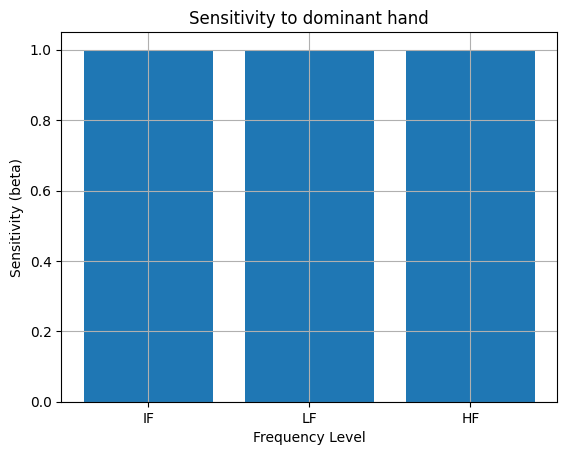

In [37]:
freq_levels = ['IF', 'LF', 'HF']
data_freq = {level: data[data.levelFreq==level] for level in freq_levels}
# print(data_freq)

# fit sigmoid on sorted data

betas = []
for level in freq_levels:
    x = data_freq[level]['levelFace']
    x1 = data_freq[level]['Hand'] == data_freq[level]['dom']
    x2 = data_freq[level]['srespChoice'] == 'Goli'
    y = x1 &  x2
    popt, pcov = curve_fit(sigmoid, x, y)
    betas.append(popt[1])
    label=[]
    pred=[]
    xx= data[data['levelFreq']==level]
    for index, row in xx.iterrows():
      if row['levelFace']>0:
        label.append(1)
        if row['srespChoice'] in ['Hasan','Goli']:
          pred.append(1)
        else:
          pred.append(0)
      if row['levelFace']<0:
        label.append(0)
        if row['srespChoice'] in ['Abbas','Mahnaz']:
          pred.append(0)
        else:
          pred.append(1)

    auc = roc_auc_score(label, pred)
    print("beta")
    print(betas)
    print("AUC score")
    print(auc)

# plot Beta coeff in bar plot

plt.grid()
plt.bar(freq_levels, betas)

plt.xlabel('Frequency Level')
plt.ylabel('Sensitivity (beta)')
plt.title('Sensitivity to dominant hand')

beta
[1.4401525335783758]
AUC score
0.8690378289473684
beta
[1.4401525335783758, 0.5184904889641667]
AUC score
0.7458196271929827
beta
[1.4401525335783758, 0.5184904889641667, 0.4024688411001252]
AUC score
0.7121025219298246


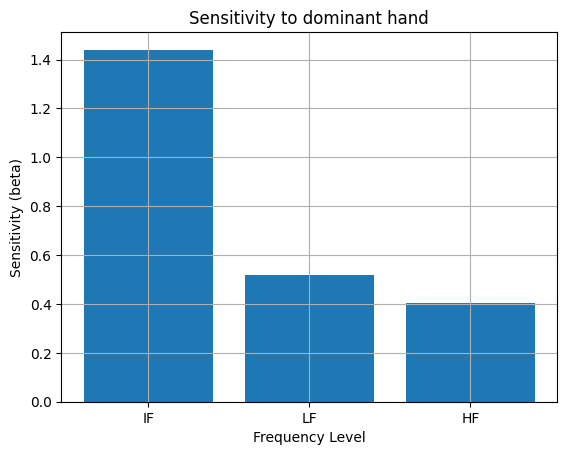

In [39]:
betas = []
# fit sigmoid on sorted data
for level in freq_levels:
    x = data_freq[level]['levelFace']
    x1 = data_freq[level]['Hand'] != data_freq[level]['dom']
    x2 = data_freq[level]['srespChoice'] == 'Goli'
    y = x1 &  x2
    popt, pcov = curve_fit(sigmoid, x, y)
    betas.append(popt[1])
    label=[]
    pred=[]
    xx= data[data['levelFreq']==level]
    for index, row in xx.iterrows():
      if row['levelFace']>0:
        label.append(1)
        if row['srespChoice'] in ['Hasan','Goli']:
          pred.append(1)
        else:
          pred.append(0)
      if row['levelFace']<0:
        label.append(0)
        if row['srespChoice'] in ['Abbas','Mahnaz']:
          pred.append(0)
        else:
          pred.append(1)

    auc = roc_auc_score(label, pred)
    print("beta")
    print(betas)
    print("AUC score")
    print(auc)    

# plot Beta coeff in bar plot

plt.grid()
plt.bar(freq_levels, betas)

plt.xlabel('Frequency Level')
plt.ylabel('Sensitivity (beta)')
plt.title('Sensitivity to dominant hand')

plt.show()

In [40]:
data = pd.read_csv('/content/data.csv')
df = pd.read_csv('/content/subjectInfo.csv')
df = df.reset_index()
df['index'] = ['sub' + str(i+1) for i in df['index']]
df.columns = ['subjectId', 'age', 'sex', 'dom']
merged_data = pd.merge(left=df, right=data, left_on='subjectId', right_on='subjectId')

In [41]:
merged_data['result'] = merged_data.apply(add_result_col_to_Data, axis=1)
merged_data['is_dom'] = merged_data.apply(domm_func, axis=1)
success = merged_data.groupby(['is_dom', 'levelFreq']).sum()
total = merged_data.groupby(['is_dom', 'levelFreq']).count()

D_HF_s, D_HF_total = success['result'].loc[1,'HF'], total['result'].loc[1,'HF']
N_HF_s, N_HF_total = success['result'].loc[0,'HF'], total['result'].loc[0,'HF']
D_LF_s, D_LF_total = success['result'].loc[1,'LF'], total['result'].loc[1,'LF']
N_LF_s, N_LF_total = success['result'].loc[0,'LF'], total['result'].loc[0,'LF']
D_IF_s, D_IF_total = success['result'].loc[1,'IF'], total['result'].loc[1,'IF']
N_IF_s, N_IF_total = success['result'].loc[0,'IF'], total['result'].loc[0,'IF']

<font color="#F4BB44"><h3>Z test analysis</h3></font>


In [65]:
x1, x2, x3 = Ztest(D_HF_s/D_HF_total, D_HF_total, N_HF_s/N_HF_total, N_HF_total), D_HF_s/D_HF_total, N_HF_s/N_HF_total
print('p-value dominant and non-dominant HF: ' + str(x1))
print('dominant dominant HF probability: ' + str(x2))
print('non-dominant dominant HF probability: ' + str(x3))

p-value dominant and non-dominant HF: 0.7883948181043998
dominant dominant HF probability: 0.7588110902255639
non-dominant dominant HF probability: 0.7570488721804511


In [66]:
x1, x2, x3 = Ztest(D_LF_s/D_LF_total, D_LF_total, N_LF_s/N_LF_total, N_LF_total), D_LF_s/D_LF_total, N_LF_s/N_LF_total
print('p-value dominant and non-dominant LF: ' + str(x1))
print('dominant dominant LF probability: ' + str(x2))
print('non-dominant dominant LF probability: ' + str(x3))

p-value dominant and non-dominant LF: 0.8957770477181338
dominant dominant LF probability: 0.7864191729323309
non-dominant dominant LF probability: 0.7872415413533834


In [67]:
x1, x2, x3 = Ztest(D_IF_s/D_IF_total, D_IF_total, N_IF_s/N_IF_total, N_IF_total), D_IF_s/D_IF_total, N_IF_s/N_IF_total
print('p-value dominant and non-dominant IF: ' + str(x1))
print('dominant IF probability: ' + str(x2))
print('non-dominant IF probability: ' + str(x3))

p-value dominant and non-dominant IF: 0.4911062874657419
dominant IF probability: 0.8893327067669173
non-dominant IF probability: 0.8926221804511278


In [68]:
x1, x2, x3 = Ztest(D_HF_s/D_HF_total, D_HF_total, D_LF_s/D_LF_total, D_LF_total), D_HF_s/D_HF_total, D_LF_s/D_LF_total
print('p-value dominant HF and LF: ' + str(x1))
print('dominant HF probability: ' + str(x2))
print('dominant LF probability: ' + str(x3))

p-value dominant HF and LF: 1.7305323060980966e-05
dominant HF probability: 0.7588110902255639
dominant LF probability: 0.7864191729323309


In [69]:
x1, x2, x3 = Ztest(D_IF_s/D_IF_total, D_IF_total, D_LF_s/D_LF_total, D_LF_total), D_IF_s/D_IF_total, D_LF_s/D_LF_total
print('p-value dominant IF and LF: ' + str(x1))
print('dominant IF probability: ' + str(x2))
print('dominant LF probability: ' + str(x3))

p-value dominant IF and LF: 3.833433030162703e-74
dominant IF probability: 0.8893327067669173
dominant LF probability: 0.7864191729323309


In [70]:
x1, x2, x3 = Ztest(D_HF_s/D_HF_total, D_HF_total, D_IF_s/D_IF_total, D_IF_total), D_HF_s/D_HF_total, D_IF_s/D_IF_total
print('p-value dominant HF and IF: ' + str(x1))
print('dominant HF probability: ' + str(x2))
print('dominant IF probability: ' + str(x3))

p-value dominant HF and IF: 8.992370214846495e-111
dominant HF probability: 0.7588110902255639
dominant IF probability: 0.8893327067669173


<font color="#F4BB44"><h3>hypotheses 5 : Are women significantly better than men in the task of identity detection</h3></font>



beta
[0.5921940447891488]
AUC score
0.7522467320261438
beta
[0.5921940447891488, 0.6851745514520942]
AUC score
0.7895833333333333


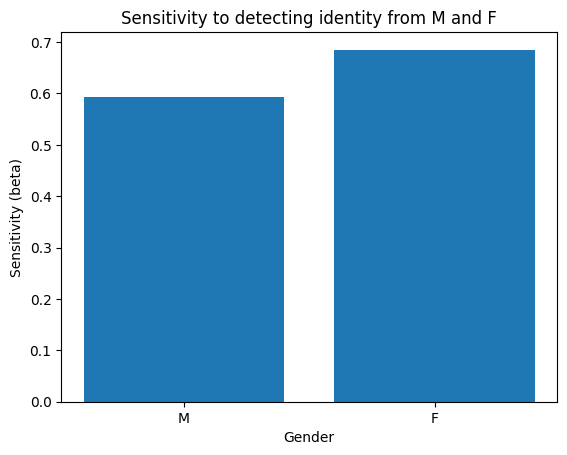

In [71]:

data = pd.read_csv('/content/merged_data.csv', on_bad_lines='skip')



sex = ['M', 'F']
data_sex = {level: data[data.sex==level] for level in sex}
# print(data_sex)

# fit sigmoid on sorted data

betas = []
for level in sex:
    x = data_sex[level]['levelFace']
    y = data_sex[level]['srespChoice'] == 'Goli'
    popt, pcov = curve_fit(sigmoid, x, y)
    betas.append(popt[1])
    label=[]
    pred=[]
    xx= data[data['sex']==level]
    for index, row in xx.iterrows():
      if row['levelFace']>0:
        label.append(1)
        if row['srespChoice'] in ['Hasan','Goli']:
          pred.append(1)
        else:
          pred.append(0)
      if row['levelFace']<0:
        label.append(0)
        if row['srespChoice'] in ['Abbas','Mahnaz']:
          pred.append(0)
        else:
          pred.append(1)

    auc = roc_auc_score(label, pred)
    print("beta")
    print(betas)
    print("AUC score")
    print(auc)  

# plot Beta coeff in bar plot

plt.bar(sex, betas)
plt.xlabel('Gender')
plt.ylabel('Sensitivity (beta)')
plt.title('Sensitivity to detecting identity from M and F')
plt.show()


beta
[0.5889951877507543]
AUC score
0.7522467320261438
beta
[0.5889951877507543, 0.8574595998887298]
AUC score
0.7895833333333333


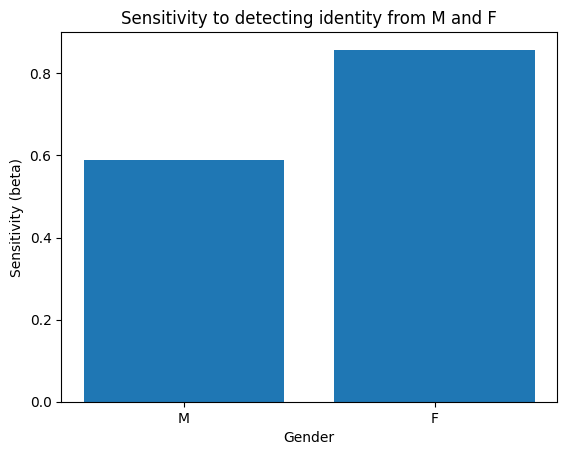

In [72]:

data = pd.read_csv('/content/merged_data.csv', on_bad_lines='skip')



sex = ['M', 'F']
data_sex = {level: data[data.sex==level] for level in sex}
# print(data_sex)

# fit sigmoid on sorted data
betas = []
for level in sex:
    x = data_sex[level]['levelFace']
    y = data_sex[level]['srespChoice'] == 'Hasan'
    popt, pcov = curve_fit(sigmoid, x, y)
    betas.append(popt[1])
    label=[]
    pred=[]
    xx= data[data['sex']==level]
    for index, row in xx.iterrows():
      if row['levelFace']>0:
        label.append(1)
        if row['srespChoice'] in ['Hasan','Goli']:
          pred.append(1)
        else:
          pred.append(0)
      if row['levelFace']<0:
        label.append(0)
        if row['srespChoice'] in ['Abbas','Mahnaz']:
          pred.append(0)
        else:
          pred.append(1)

    auc = roc_auc_score(label, pred)
    print("beta")
    print(betas)
    print("AUC score")
    print(auc)  


# plot Beta coeff in bar plot

plt.bar(sex, betas)
plt.xlabel('Gender')
plt.ylabel('Sensitivity (beta)')
plt.title('Sensitivity to detecting identity from M and F')
plt.show()

<font color="#F4BB44"><h3>Z test analysis</h3></font>


In [89]:
data['result'] = data.apply(add_result_col_to_Data, axis=1)
success = data.groupby(['sex']).sum()
total = data.groupby(['sex']).count()

M_s, M_total = success['result'].loc['M'], total['result'].loc['M']
F_s, F_total = success['result'].loc['F'], total['result'].loc['F']

x1, x2, x3 = Ztest(M_s/M_total, M_total, F_s/F_total, F_total), M_s/M_total, F_s/F_total 
print('p-value Male and Female: ' + str(x1))
print('Male probability: ' + str(x2))
print('Female probability: ' + str(x3))

p-value Male and Female: 1.0787338302080971e-22
Male probability: 0.7904849439775911
Female probability: 0.8251488095238095


In [74]:
from sklearn import metrics
from sklearn.metrics import roc_curve
def not_gate(row):
    if row['result']:
        return row['srespLoc'] == 'right'
    else:
        return row['srespLoc'] != 'right'

def fpr_tpr(df):
    y_pred = (df['srespLoc'] == 'right') * 1
    y_real = df.apply(not_gate, axis=1)
    fpr, tpr, thresholds =roc_curve(y_real,y_pred)
    return fpr, tpr

In [75]:
fpr_1, tpr_1 = fpr_tpr(data[data['sex'] == 'M'])
fpr_2, tpr_2 = fpr_tpr(data[data['sex'] == 'F'])

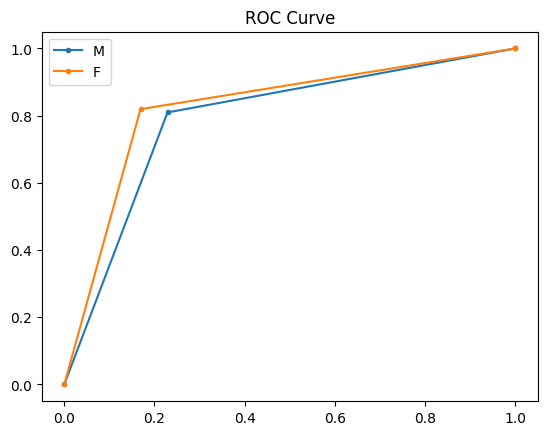

In [76]:
plt.plot(fpr_1, tpr_1, marker='.', label='M')
plt.plot(fpr_2, tpr_2, marker='.', label='F')
plt.legend()
plt.title('ROC Curve')
plt.show()

<font color="#F4BB44"><h3>hypotheses 6 : Make a new hypotheses!</h3></font>


In [77]:
def z_test_func(p1, n1, p2, n2):
    p_pool = (n1 * p1 + n2 * p2) / (n1 + n2)
    se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
    z = abs(p1 - p2) / se
    p_values = norm.sf(abs(z)) * 2
    return p_values

beta
[1.4687573724756087]
AUC score
0.8466605392156862
beta
[1.4687573724756087, 1.3827603556201722]
AUC score
0.8829427083333334
beta
[0.46391917464809396]
AUC score
0.7313112745098038
beta
[0.46391917464809396, 0.5438643047864428]
AUC score
0.75234375
beta
[0.31842258542199015]
AUC score
0.6787683823529412
beta
[0.31842258542199015, 0.450447372703915]
AUC score
0.7334635416666667


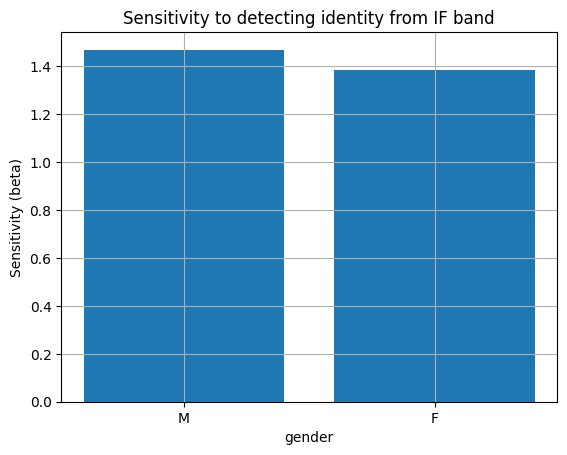

In [78]:
# Load the data

data = pd.read_csv('/content/merged_data.csv', on_bad_lines='skip')

freq_levels = ['IF', 'LF', 'HF']

data_freq_IF = data[data.levelFreq=='IF'] 
data_freq_LF = data[data.levelFreq=='LF'] 
data_freq_HF = data[data.levelFreq=='HF'] 

sex = ['M', 'F']
data_freq_IF_sorted = {level: data_freq_IF[data_freq_IF.sex==level] for level in sex}
data_freq_LF_sorted = {level: data_freq_LF[data_freq_LF.sex==level] for level in sex}
data_freq_HF_sorted = {level: data_freq_HF[data_freq_HF.sex==level] for level in sex}

# print(data_freq_IF_sorted)

def sigmoid(x, alpha, beta):
    return alpha / (1 + np.exp(-beta*x))

betas_IF = []
for level in sex:
    x = data_freq_IF_sorted[level]['levelFace']
    y = data_freq_IF_sorted[level]['srespChoice'] == 'Goli'
    popt, pcov = curve_fit(sigmoid, x, y)
    betas_IF.append(popt[1])
    label=[]
    pred=[]
    xx= data_freq_IF[data_freq_IF['sex']==level]
    for index, row in xx.iterrows():
      if row['levelFace']>0:
        label.append(1)
        if row['srespChoice'] in ['Hasan','Goli']:
          pred.append(1)
        else:
          pred.append(0)
      if row['levelFace']<0:
        label.append(0)
        if row['srespChoice'] in ['Abbas','Mahnaz']:
          pred.append(0)
        else:
          pred.append(1)

    auc = roc_auc_score(label, pred)
    print("beta")
    print(betas_IF)
    print("AUC score")
    print(auc)

betas_LF = []
for level in sex:
    x = data_freq_LF_sorted[level]['levelFace']
    y = data_freq_LF_sorted[level]['srespChoice'] == 'Goli'
    popt, pcov = curve_fit(sigmoid, x, y)
    betas_LF.append(popt[1])
    label=[]
    pred=[]
    xx= data_freq_LF[data_freq_LF['sex']==level]
    for index, row in xx.iterrows():
      if row['levelFace']>0:
        label.append(1)
        if row['srespChoice'] in ['Hasan','Goli']:
          pred.append(1)
        else:
          pred.append(0)
      if row['levelFace']<0:
        label.append(0)
        if row['srespChoice'] in ['Abbas','Mahnaz']:
          pred.append(0)
        else:
          pred.append(1)

    auc = roc_auc_score(label, pred)
    print("beta")
    print(betas_LF)
    print("AUC score")
    print(auc)


betas_HF = []
for level in sex:
    x = data_freq_HF_sorted[level]['levelFace']
    y = data_freq_HF_sorted[level]['srespChoice'] == 'Goli'
    popt, pcov = curve_fit(sigmoid, x, y)
    betas_HF.append(popt[1])
    label=[]
    pred=[]
    xx= data_freq_HF[data_freq_HF['sex']==level]
    for index, row in xx.iterrows():
      if row['levelFace']>0:
        label.append(1)
        if row['srespChoice'] in ['Hasan','Goli']:
          pred.append(1)
        else:
          pred.append(0)
      if row['levelFace']<0:
        label.append(0)
        if row['srespChoice'] in ['Abbas','Mahnaz']:
          pred.append(0)
        else:
          pred.append(1)

    auc = roc_auc_score(label, pred)
    print("beta")
    print(betas_HF)
    print("AUC score")
    print(auc)


plt.bar(sex, betas_IF)
plt.grid()
plt.xlabel('gender')
plt.ylabel('Sensitivity (beta)')
plt.title('Sensitivity to detecting identity from IF band')
plt.show()


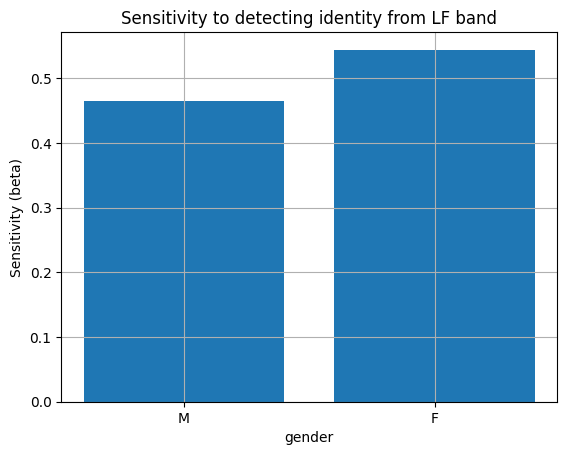

In [79]:
plt.bar(sex, betas_LF)
plt.grid()
plt.xlabel('gender')
plt.ylabel('Sensitivity (beta)')
plt.title('Sensitivity to detecting identity from LF band')
plt.show()

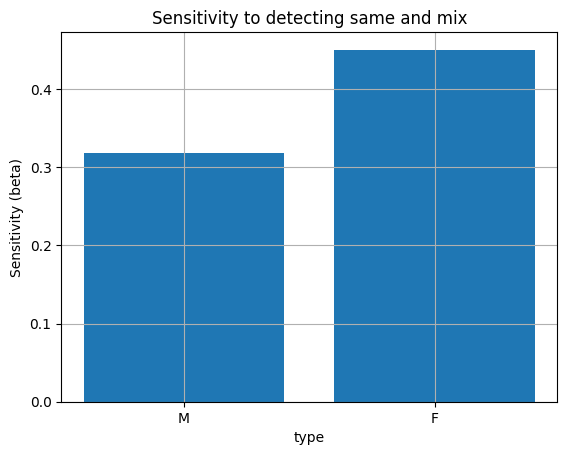

In [103]:
plt.bar(sex, betas_HF)
plt.grid()
plt.xlabel('gender')
plt.ylabel('Sensitivity (beta)')
plt.title('Sensitivity to detecting identity from HF band')
plt.show()

In [81]:
def exp_result(row):
    if row['levelFace'] == 0:
        return 1
    elif row['levelFace'] > 0:
        if row['trialKeys'] == 'MahGol' and row['srespChoice'] == 'Goli':
            return 1
        elif row['trialKeys'] == 'AbHa' and row['srespChoice'] == 'Hasan':
            return 1
        else:
            return 0
    elif row['levelFace'] < 0:
        if row['trialKeys'] == 'MahGol' and row['srespChoice'] == 'Goli':
            return 0
        elif row['trialKeys'] == 'AbHa' and row['srespChoice'] == 'Hasan':
            return 0
        else:
            return 1
data['result'] = data.apply(exp_result, axis=1)

In [82]:
success = data.groupby(['sex', 'levelFreq']).sum()
total = data.groupby(['sex', 'levelFreq']).count()

L_HF_s, L_HF_tot = success['result'].loc['M','HF'], total['result'].loc['M','HF']
R_HF_s, R_HF_tot = success['result'].loc['F','HF'], total['result'].loc['F','HF']
L_LF_s, L_LF_tot = success['result'].loc['M','LF'], total['result'].loc['M','LF']
R_LF_s, R_LF_tot = success['result'].loc['F','LF'], total['result'].loc['F','LF']
L_IF_s, L_IF_tot = success['result'].loc['M','IF'], total['result'].loc['M','IF']
R_IF_s, R_IF_tot = success['result'].loc['F','IF'], total['result'].loc['F','IF']

In [90]:
p_value, p1, p2 = z_test_func(R_HF_s/R_HF_tot, R_HF_tot, L_HF_s/L_HF_tot, L_HF_tot), R_HF_s/R_HF_tot, L_HF_s/L_HF_tot
print('p-value Right and Left hand HF: ' + str(p_value))
print('Right hand HF probality: ' + str(p1))
print('Left hand HF probality: ' + str(p2))

p-value Right and Left hand HF: 1.5593127469928302e-13
Right hand HF probality: 0.7775669642857143
Left hand HF probality: 0.7280724789915967


In [91]:
p_value, p1, p2 = z_test_func(R_LF_s/R_LF_tot, R_LF_tot, L_LF_s/L_LF_tot, L_LF_tot), R_LF_s/R_LF_tot, L_LF_s/L_LF_tot
print('p-value Right and Left hand HF: ' + str(p_value))
print('Right hand HF probality: ' + str(p1))
print('Left hand HF probality: ' + str(p2))

p-value Right and Left hand HF: 0.001046497288379553
Right hand HF probality: 0.7938616071428571
Left hand HF probality: 0.7728466386554622


In [92]:
p_value, p1, p2 = z_test_func(R_IF_s/R_IF_tot, R_IF_tot, L_IF_s/L_IF_tot, L_IF_tot), R_IF_s/R_IF_tot, L_IF_s/L_IF_tot
print('p-value Right and Left hand HF: ' + str(p_value))
print('Right hand HF probality: ' + str(p1))
print('Left hand HF probality: ' + str(p2))

p-value Right and Left hand HF: 8.55437039726457e-12
Right hand HF probality: 0.9040178571428571
Left hand HF probality: 0.8705357142857143


In [94]:
from sklearn import metrics
from sklearn.metrics import roc_curve
def not_gate(row):
    if row['result']:
        return row['srespLoc'] == 'right'
    else:
        return row['srespLoc'] != 'right'

def fpr_tpr(df):
    y_pred = (df['srespLoc'] == 'right') * 1
    y_real = df.apply(not_gate, axis=1)
    fpr, tpr, thresholds =roc_curve(y_real,y_pred)
    return fpr, tpr

In [95]:
fpr_1, tpr_1 = fpr_tpr(data[data['sex'] == 'M'])
fpr_2, tpr_2 = fpr_tpr(data[data['sex'] == 'F'])

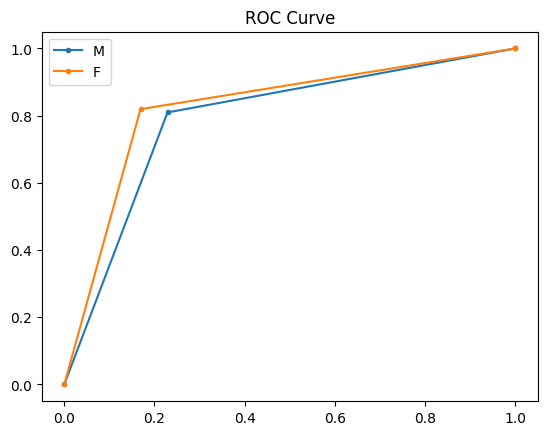

In [88]:
plt.plot(fpr_1, tpr_1, marker='.', label='M')
plt.plot(fpr_2, tpr_2, marker='.', label='F')
plt.legend()
plt.title('ROC Curve')
plt.show()

<font color="#F4BB44"><h3>hypotheses 7 : Mixed Trials</h3></font>


In [96]:
def z_test_func(p1, n1, p2, n2):
    p_pool = (n1 * p1 + n2 * p2) / (n1 + n2)
    se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))
    z = abs(p1 - p2) / se
    p_values = norm.sf(abs(z)) * 2
    return p_values

In [97]:
def exp_result(row):
    if row['levelFace'] == 0:
        return 1
    elif row['levelFace'] > 0:
        if row['trialKeys'] == 'MahGol' and row['srespChoice'] == 'Goli':
            return 1
        elif row['trialKeys'] == 'AbHa' and row['srespChoice'] == 'Hasan':
            return 1
        else:
            return 0
    elif row['levelFace'] < 0:
        if row['trialKeys'] == 'MahGol' and row['srespChoice'] == 'Goli':
            return 0
        elif row['trialKeys'] == 'AbHa' and row['srespChoice'] == 'Hasan':
            return 0
        else:
            return 1
data['result'] = data.apply(exp_result, axis=1)

In [99]:
success_rate = data.groupby(['blockType']).sum()
total = data.groupby(['blockType']).count()

In [100]:
S_s, S_t = success_rate['result'].loc['same'], total['result'].loc['same']
M_s, M_t = success_rate['result'].loc['mix'], total['result'].loc['mix']

In [102]:
x1, x2, x3 = z_test_func(M_s/M_t, M_t, S_s/S_t, S_t), M_s/M_t, S_s/S_t
print('p-value Mixed , Same: ' + str(x1))
print('Mixed probability: ' + str(x2))
print('Same probability: ' + str(x3))

p-value Mixed , Same: 8.396562244611553e-10
Mixed probability: 0.8013001253132832
Same probability: 0.8225250626566416
